# Emergency - 911 Calls

This project consists on analyzing 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Setup and data loading

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Load data to a dataframe and preview data **

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic information

** Most frequent types of emergencies **

In [6]:
df["title"].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

** Top 5 zipcodes for 911 calls **

In [7]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships for 911 calls **

In [8]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique titles **

In [9]:
df["title"].nunique()

110

## Pre-processing and exploratory data analysis

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. 
The following code creates a new column called "Reason" that only contains this string value. **

In [10]:
df["Reason"] = df["title"].apply(lambda s: s.split(":")[0])

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** Most common reason for a 911 call **

In [12]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Countplot of 911 calls by Reason **

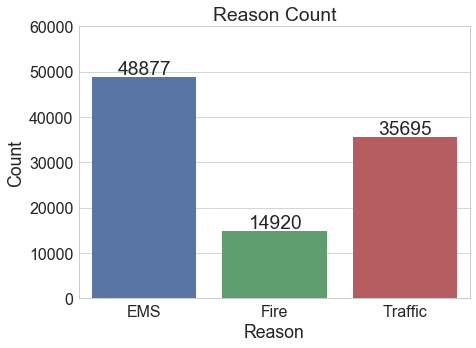

In [13]:
sns.set_context(context="paper", font_scale=2)
plt.figure (figsize=(7,5))
ax = sns.countplot(x="Reason", data = df)
ax.set_title("Reason Count")
ax.set_ylim([0,60000])
ax.set_ylabel("Count")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+500))

In [14]:
type(df["timeStamp"][1])

str

___
** Converting the column "timeStamp" from strings to DateTime objects to facilitate the analysis. **

In [15]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [16]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [17]:
df["timeStamp"][0]

Timestamp('2015-12-10 17:40:00')

In [18]:
df["timeStamp"][0].day

10

** The following code creates 3 new columns called Hour, Month, and Day of Week **

In [19]:
df["Hour"] = df["timeStamp"].apply(lambda t: t.hour)
df["Month"] = df["timeStamp"].apply(lambda t: t.month)
df["Day of Week"] = df["timeStamp"].apply(lambda t: t.dayofweek)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**The Day of the Week is an integer (0-6). We can map the actual string names to the day of the week using the following dictionary.**

In [21]:
dowmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df["Day of Week"] = df["Day of Week"].map(dowmap)

** Countplot of the Day of Week column **

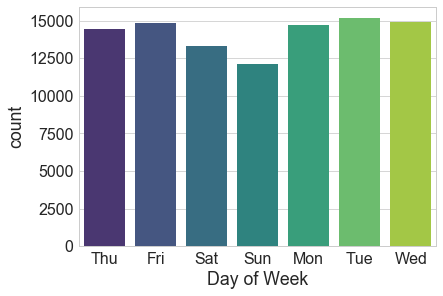

In [23]:
sns.countplot(x = df["Day of Week"], data=df, palette="viridis")

** With the hue based off of the Reason column **

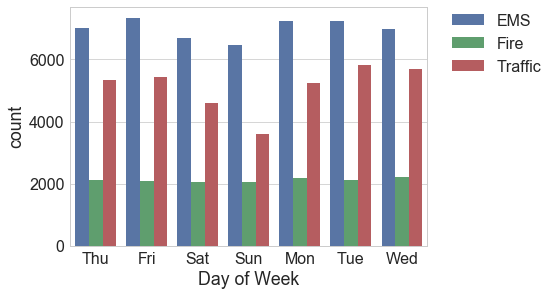

In [24]:
sns.countplot(x = df["Day of Week"], data=df, hue = "Reason")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There is a small drop on weekends because the number of calls related to EMS and Traffic are lower, the number of Fire related calls however remain mostly the same.

** Same for month **

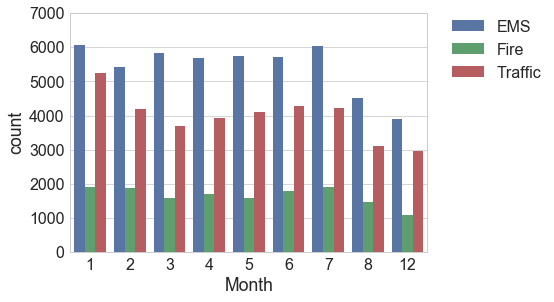

In [25]:
ax_month = sns.countplot(x = df["Month"], data=df, hue = "Reason")
ax_month.set_ylim([0,7000])
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The data is missing some months (9, 10, 11)

### Filling in missing months information

** First create a groupby object **

In [26]:
gbmonth = df.groupby("Month").count()
gbmonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Plot of number of calls per month **

(7000, 14000)

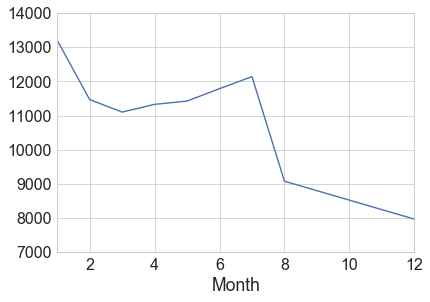

In [27]:
ax_gbmonth = gbmonth['lat'].plot()
ax_gbmonth.set_ylim([7000,14000])

This graph indicates that there are fewer emergency calls during the october-december period.

** Linear fit of number of calls per month using lmplot() **

(6000, 15000)

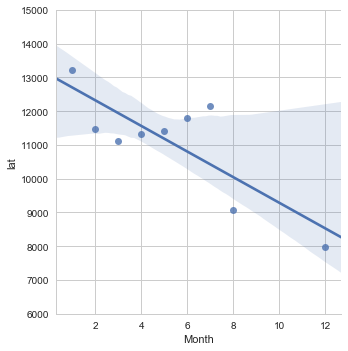

In [28]:
sns.set_context(context="notebook", font_scale=1)
lm = sns.lmplot(x='Month',y='lat',data=gbmonth.reset_index())
axes = lm.axes
axes[0,0].set_ylim(6000,15000)

### Count of 911 calls by date

In [29]:
df["Date"] = df["timeStamp"].apply(lambda t: t.date())

** Plot of counts of 911 calls **

<function matplotlib.pyplot.tight_layout>

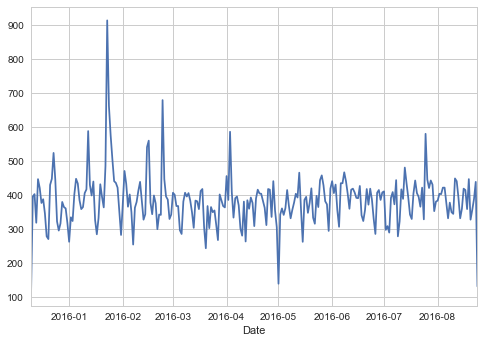

In [30]:
gbdate = df.groupby("Date").count()
gbdate["lat"].plot()
plt.tight_layout

** The following code generates the same plot for each reason separately **

<function matplotlib.pyplot.tight_layout>

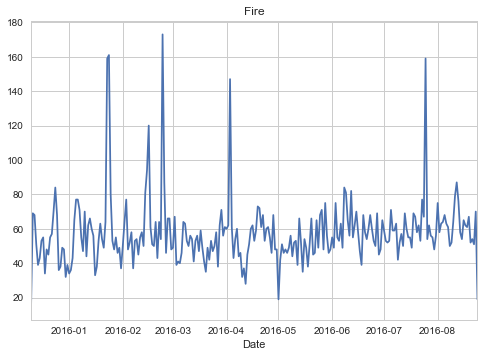

In [31]:
gbdate = df[df["Reason"]=="Fire"].groupby("Date").count()
gbdate["lat"].plot()
plt.title("Fire")
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

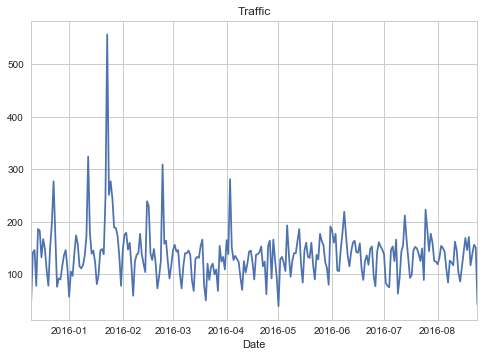

In [32]:
gbdate = df[df["Reason"]=="Traffic"].groupby("Date").count()
gbdate["lat"].plot()
plt.title("Traffic")
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

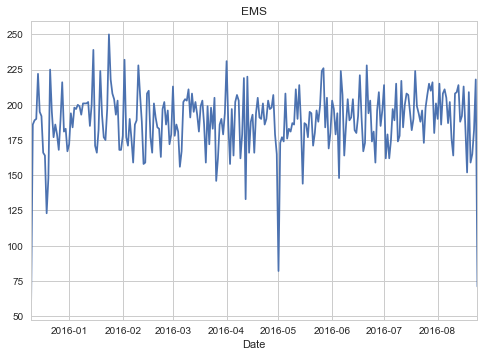

In [33]:
gbdate = df[df["Reason"]=="EMS"].groupby("Date").count()
gbdate["lat"].plot()
plt.title("EMS")
plt.tight_layout

### Heatmaps and Clustermaps

** Heatmaps help us to easily visualize when are the most calls made. The dataframe has to be restructured beforehand so that the columns become the Hours and the Index becomes the Day of the Week. **

In [34]:
dayhour = df.groupby(["Day of Week", "Hour"])["lat"].count().unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** The following code creates a Heatmap using this new DataFrame **

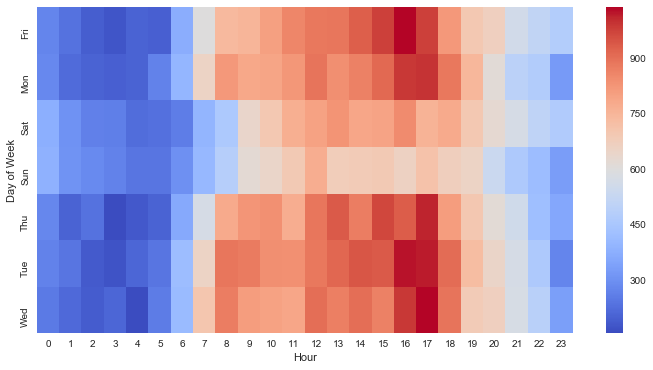

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour, cmap="coolwarm")

** Clustermap of the same DataFrame. **

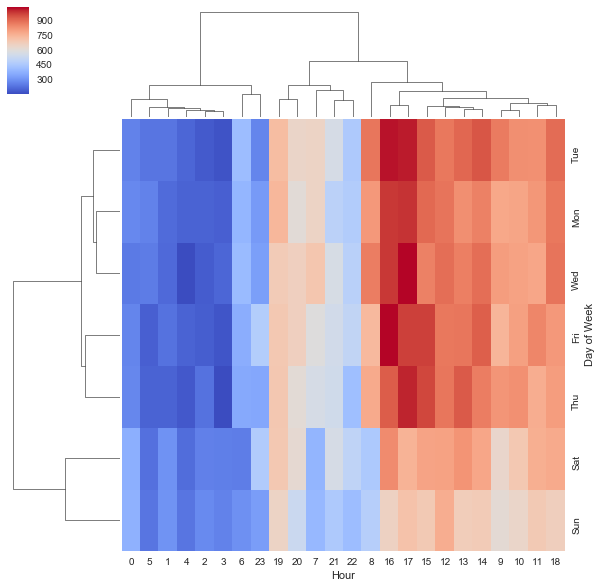

In [36]:
%%capture --no-display
sns.clustermap(dayhour, cmap="coolwarm")

In this maps we can clearly see that most of the calls take place around the end of office hours on weekdays. It makes sense that the lowest number of calls are occurring between hours 0-5 when most people sleep.

** Same plots and operations, for a DataFrame that shows the Month as the column**

In [37]:
daymonth = df.groupby(["Day of Week", "Month"])["lat"].count().unstack()
daymonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


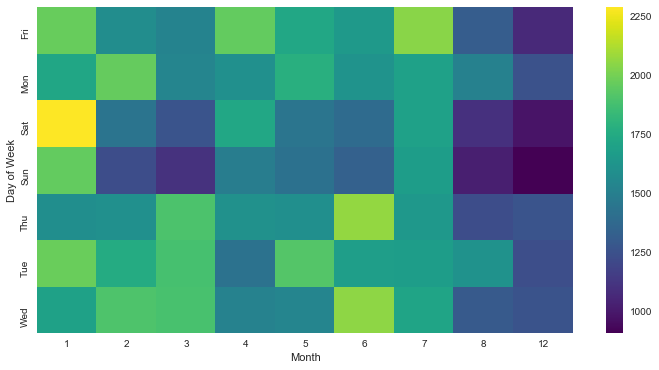

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth, cmap="viridis")

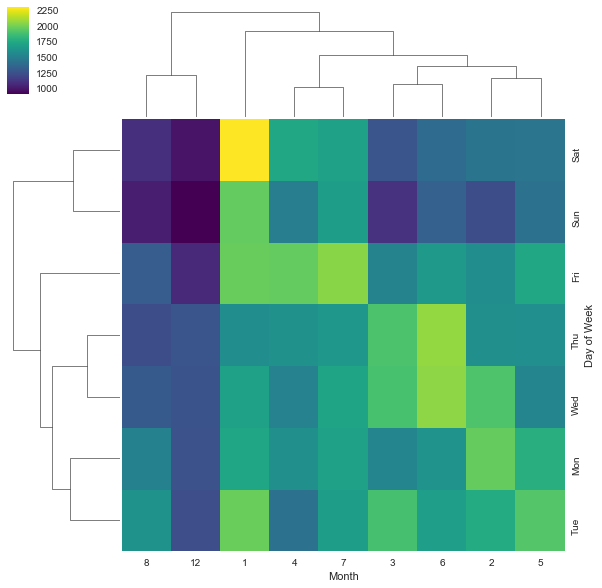

In [39]:
%%capture --no-display
sns.clustermap(daymonth, cmap="viridis")